In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import os
import sys
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn/pppc')
sys.path.insert(0, '/data/programs/probe_position_correction_w_ptychonn')
import numpy as np
import torch
import matplotlib.pyplot as plt

import pppc
from pppc.configs import InferenceConfigDict
from pppc.ptychonn.model import PtychoNNModel
from pppc.reconstructor import DatasetInferencer, TileStitcher
from pppc.position_list import ProbePositionList
from pppc.io import NPZFileHandle

os.chdir('/data/programs/probe_position_correction_w_ptychonn/workspace/large')

In [3]:
config_dict = InferenceConfigDict()
config_dict['model_path'] = '../../trained_models/model_36SpiralDatasets_model_PtychoNNModel_nLevels_4_batchSizePerProcess_32_learningRatePerProcess_0.0001/best_model.pth'
config_dict['model'] = (PtychoNNModel, {'n_levels': 4})
config_dict['batch_size'] = 32
config_dict['prediction_output_path'] = 'outputs/pred_' + os.path.basename(os.path.dirname(config_dict['model_path']))
config_dict['dp_data_file_handle'] = NPZFileHandle('data/scan221.npz')
config_dict['dp_data_file_handle'].transform_data((128, 128))
config_dict['cpu_only'] = True

In [ ]:
inferencer = DatasetInferencer(config_dict)
inferencer.build()
inferencer.run()

In [41]:
config_dict['prediction_output_path'] = 'outputs/pred_' + os.path.basename(os.path.dirname(config_dict['model_path']))
config_dict['probe_position_list'] = ProbePositionList(file_path='data/positions221.csv', unit='m', psize_nm=8, convert_to_pixel=False, first_is_x=False)
config_dict['central_crop'] = (40, 40)

In [42]:
stitcher = TileStitcher(config_dict)
stitcher.build()
stitcher.run()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 961/961 [00:22<00:00, 43.15it/s]


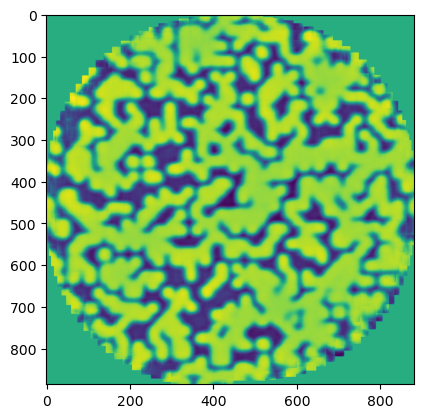

In [43]:
image_stitched_ptychonn = stitcher.image_stitched
plt.imshow(image_stitched_ptychonn)
plt.show()

Ground truth

In [44]:
config_dict['prediction_output_path'] = 'data/scan221_phase.tiff'
config_dict['probe_position_list'] = ProbePositionList(file_path='data/positions221.csv', unit='m', psize_nm=8, convert_to_pixel=False, first_is_x=False)

stitcher = TileStitcher(config_dict)
stitcher.build()
stitcher.run()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 961/961 [00:23<00:00, 41.33it/s]


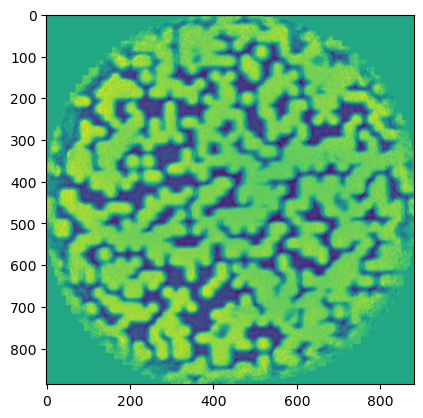

In [45]:
image_stitched_gt = stitcher.image_stitched
plt.imshow(image_stitched_gt)
plt.show()

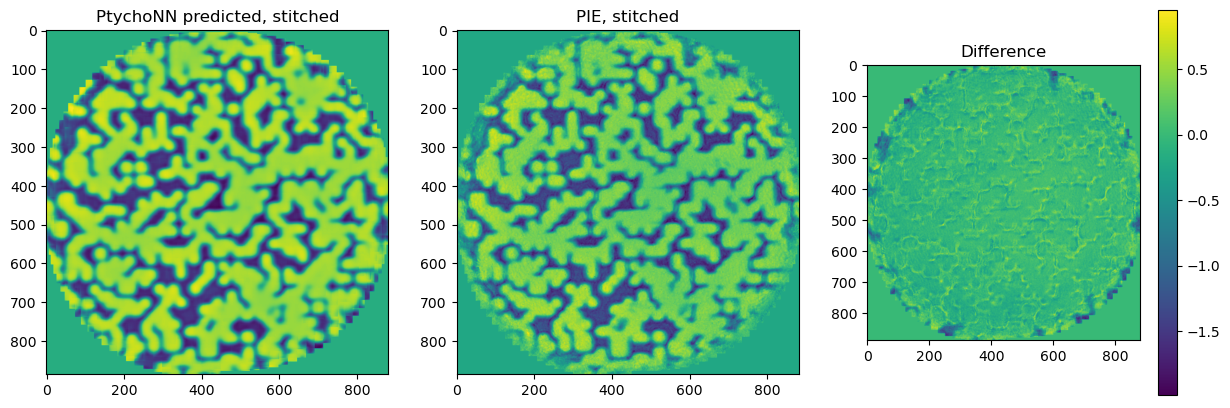

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image_stitched_ptychonn)
ax[0].set_title('PtychoNN predicted, stitched')
ax[1].imshow(image_stitched_gt)
ax[1].set_title('PIE, stitched')
im = ax[2].imshow(image_stitched_ptychonn - image_stitched_gt)
ax[2].set_title('Difference')
plt.colorbar(im, ax=ax[2])
plt.show()